In [1]:
import pandas as pd
import os

#### Iterar sobre todos os arquivos e os transforma em DataFrames, em seguida junta os de emprestimo

## Dia 1 - Importando os Dados

In [2]:
exemplares = pd.read_parquet("Datasets\dados_exemplares.parquet")

pasta = os.fsencode("Datasets\dados_emprestimos")

for arquivo in os.listdir(pasta):
  nomeArquivo = os.fsdecode(arquivo)
  caminhoArquivo = os.path.join(pasta.decode(),nomeArquivo)
  dataSetIterator = pd.read_csv(caminhoArquivo)
  
  if nomeArquivo == "emprestimos-20101.csv":
    df = dataSetIterator
  else :
    df = pd.concat([df,dataSetIterator])
    

#### Agora usarei um inner join para inserir tabelas de dados diferentes com um eixo em comum

In [3]:
df = df.merge(exemplares)
df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,75019
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,44494
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225


In [4]:
df.drop_duplicates(inplace= True)
# Removendo as linhas duplicadas


## Dia 2 - Manipulação

In [5]:

def evaluate(codigo):
    if codigo < 99 and codigo > 0:
        return "Generalidades. Ciência e conhecimento."
    elif codigo <= 199:
        return "Filosofia e psicologia"
    elif codigo <= 299:
        return "Religião"
    elif codigo <= 399:
        return"Ciências sociais"
    elif codigo <= 499:
        return "Classe vaga. Provisoriamente não ocupada."
    elif codigo <= 599:
        return "Matemática e ciências naturais"
    elif codigo <= 699:
        return "Ciências aplicadas"
    elif codigo <= 799:
        return "Belas Artes"
    elif codigo <= 899:
        return "Linguagem. Língua. Linguística."
    elif codigo <= 999:
        return "Geografia. Biografia. História."
    else:
        return "Codigo Invalido"

df["CDU"] = df["localizacao"].astype(int).apply(evaluate)

df.head()


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,CDU
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,75019,Ciências aplicadas
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,44494,Ciências aplicadas
8,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,91736,Ciências aplicadas


In [6]:
df.value_counts(df['CDU'])

CDU
Ciências aplicadas                        1425473
Ciências sociais                           369536
Matemática e ciências naturais              68744
Religião                                    62295
Filosofia e psicologia                      61862
Generalidades. Ciência e conhecimento.      61222
Geografia. Biografia. História.              7989
Belas Artes                                  7911
Linguagem. Língua. Linguística.              7490
Name: count, dtype: int64

In [7]:
df.drop(columns= 'registro_sistema', inplace = True)

In [8]:
df['matricula_ou_siape'] = df['matricula_ou_siape'].astype('str')

df.dtypes

id_emprestimo            int64
codigo_barras           object
data_renovacao          object
data_emprestimo         object
data_devolucao          object
matricula_ou_siape      object
tipo_vinculo_usuario    object
id_exemplar              int64
colecao                 object
biblioteca              object
status_material         object
localizacao              int64
CDU                     object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2072522 entries, 0 to 2072557
Data columns (total 13 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   id_emprestimo         int64 
 1   codigo_barras         object
 2   data_renovacao        object
 3   data_emprestimo       object
 4   data_devolucao        object
 5   matricula_ou_siape    object
 6   tipo_vinculo_usuario  object
 7   id_exemplar           int64 
 8   colecao               object
 9   biblioteca            object
 10  status_material       object
 11  localizacao           int64 
 12  CDU                   object
dtypes: int64(3), object(10)
memory usage: 221.4+ MB


## Dia 3 - Análise exploratória de dados e DateTime

In [10]:
df['id_emprestimo'].value_counts(sort= True)

id_emprestimo
2772079     3
2010326     3
2014596     3
10240112    3
2595954     3
           ..
1523986     1
1523984     1
1523983     1
1523981     1
2989090     1
Name: count, Length: 2068724, dtype: int64

In [11]:
emprestimos_completos = df

In [12]:
emprestimos_completos.loc[emprestimos_completos['id_emprestimo']== 2772079]

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
1864884,2772079,2010082016,2018/12/03 16:05:57.708000000,2018/11/22 18:28:01.619000000,2018/12/11 17:54:14.000000000,20182022833.0,ALUNO DE PÓS-GRADUAÇÃO,1055570,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,670,Ciências aplicadas
1864885,2772079,2010082016,2018/12/03 16:05:57.708000000,2018/11/22 18:28:01.619000000,2018/12/11 17:54:14.000000000,20182022833.0,ALUNO DE PÓS-GRADUAÇÃO,1055922,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,693,Ciências aplicadas
1864886,2772079,2010082016,2018/12/03 16:05:57.708000000,2018/11/22 18:28:01.619000000,2018/12/11 17:54:14.000000000,20182022833.0,ALUNO DE PÓS-GRADUAÇÃO,1056360,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,389,Ciências sociais


In [13]:
# Quantidade de exemplares emprestados por ano
emprestimos_data = pd.DataFrame(emprestimos_completos["data_emprestimo"].value_counts()).reset_index()
# Criando um novo dataframe com index resetado
emprestimos_data.columns = ['data','quantidade']
emprestimos_data['data'] = pd.to_datetime(emprestimos_data['data'])
emprestimos_data

,data,quantidade
0,2015-06-10 18:51:56.994,3
1,2018-02-22 10:45:11.523,3
2,2014-01-28 14:49:50.505,3
3,2015-08-18 19:11:08.653,3
4,2014-07-14 15:35:51.822,3
...,...,...
2068686,2013-06-06 17:41:22.688,1
2068687,2013-06-06 17:40:06.074,1
2068688,2013-06-06 17:39:44.209,1
2068689,2013-06-06 17:34:42.071,1


In [14]:
emprestimos_ano = emprestimos_data['data'].dt.year.value_counts().sort_index()
emprestimos_por_ano = pd.DataFrame(emprestimos_ano)
emprestimos_por_ano.columns = ['quantidade']
emprestimos_por_ano.index.name = 'ano'
emprestimos_por_ano

,quantidade
ano,
2010,161277
2011,196199
2012,221141
2013,234431
2014,218765
2015,213117
2016,215411
2017,217974
2018,193547


### Plotando Gráficos Livros por Ano

In [15]:
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [16]:
sns.set_theme(context='notebook', 
              style='darkgrid', 
              palette='deep', 
              font_scale=1.3, 
              rc={"figure.figsize":(15,8)})

<Axes: title={'left': 'Quantidade de exemplares emprestados do SISBI por ano\n'}, xlabel='Ano', ylabel='Quantidade de Emprestimos'>

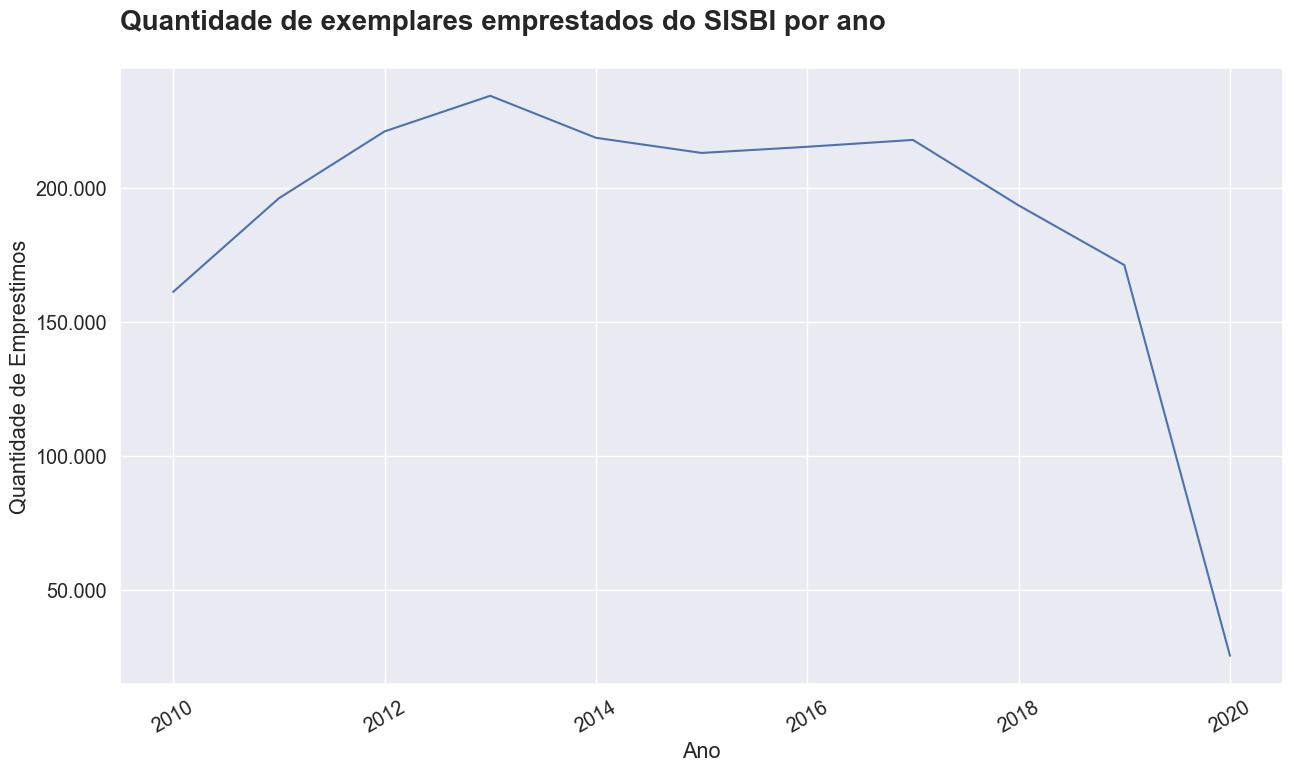

In [17]:
ax = sns.lineplot(data=emprestimos_por_ano,x='ano',y='quantidade')
ax.set(xlabel= 'Ano',ylabel='Quantidade de Emprestimos')
ax.tick_params(axis='x', rotation=30)
# O Comando acima inclina os parametros de x
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
# O comando acima formate os numeros no eixo y   

ax.set_title('Quantidade de exemplares emprestados do SISBI por ano'+'\n',size=20,loc='left',weight='bold')

ax

In [18]:
emprestimos_mes = emprestimos_data['data'].dt.month.value_counts().sort_index()
emprestimos_por_mes = pd.DataFrame(emprestimos_mes)
emprestimos_por_mes.columns = ['quantidade']
emprestimos_por_mes.index.name = 'mes'
emprestimos_por_mes.head(20)

,quantidade
mes,
1,67391
2,209839
3,251710
4,208339
5,202139
6,137815
7,123588
8,232371
9,207875


In [19]:
dicionario_meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}

emprestimos_por_mes.index = emprestimos_por_mes.index.map(dicionario_meses)

In [20]:
emprestimos_por_mes

,quantidade
mes,
Jan,67391
Fev,209839
Mar,251710
Abr,208339
Mai,202139
Jun,137815
Jul,123588
Ago,232371
Set,207875


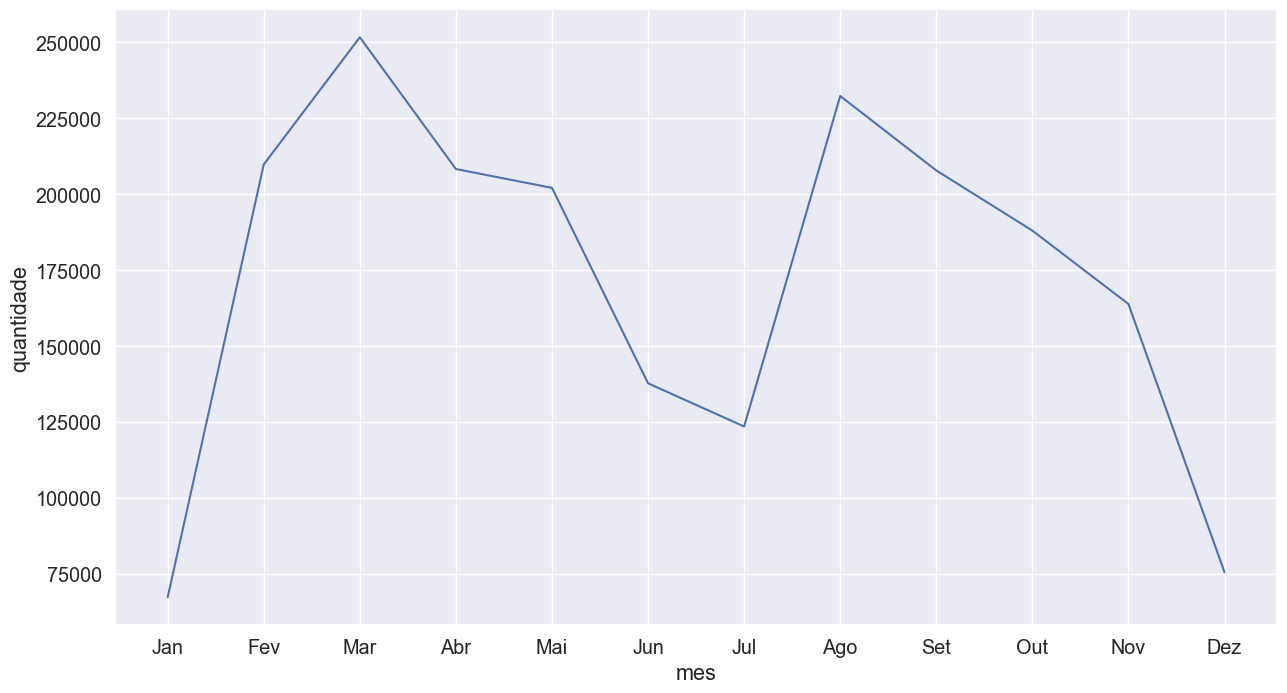

In [21]:
sns.lineplot(emprestimos_por_mes, x= 'mes', y='quantidade')
sns.set_style(style="dark")

In [22]:
emprestimos_horas = pd.DataFrame(emprestimos_data['data'].dt.hour.value_counts())
emprestimos_horas.index.name = 'horas'
emprestimos_horas.columns = ["quantidade"]
emprestimos_por_hora = emprestimos_horas.rename(index= {0:24}).sort_index()

emprestimos_por_hora.head(20)



,quantidade
horas,
6,14
7,18735
8,103226
9,131032
10,185457
11,179713
12,148459
13,126756
14,150571


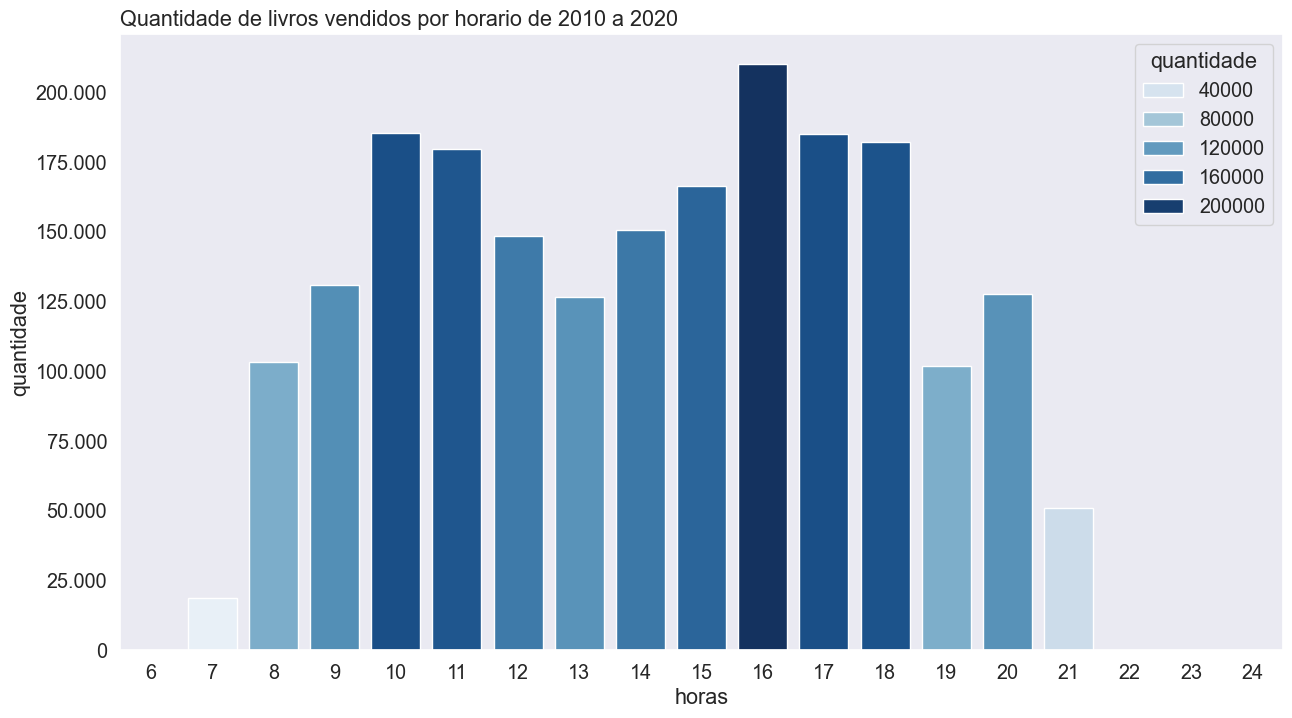

In [23]:
gr = sns.barplot(data=emprestimos_por_hora,y='quantidade',x='horas',
                 palette='Blues',hue='quantidade',dodge=False) 
gr.set_title(loc= "left", label= "Quantidade de livros vendidos por horario de 2010 a 2020")
gr.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))           

In [24]:
emprestimos_minuto = pd.DataFrame(emprestimos_data['data'].dt.minute.value_counts()).sort_index()
emprestimos_minuto.index.name = 'minuto'
emprestimos_minuto.columns = ['quantidade']
emprestimos_minuto

,quantidade
minuto,
0,34500
1,34376
2,34120
3,33882
4,33690
5,33781
6,33320
7,33256
8,32817


In [25]:
emprestimos_minuto.describe()

,quantidade
count,60.000000
mean,34478.183333
std,1832.960442
min,32048.000000
25%,32646.250000
50%,34174.500000
75%,36293.750000
max,37496.000000


Text(0.5, 0, 'Minutos')

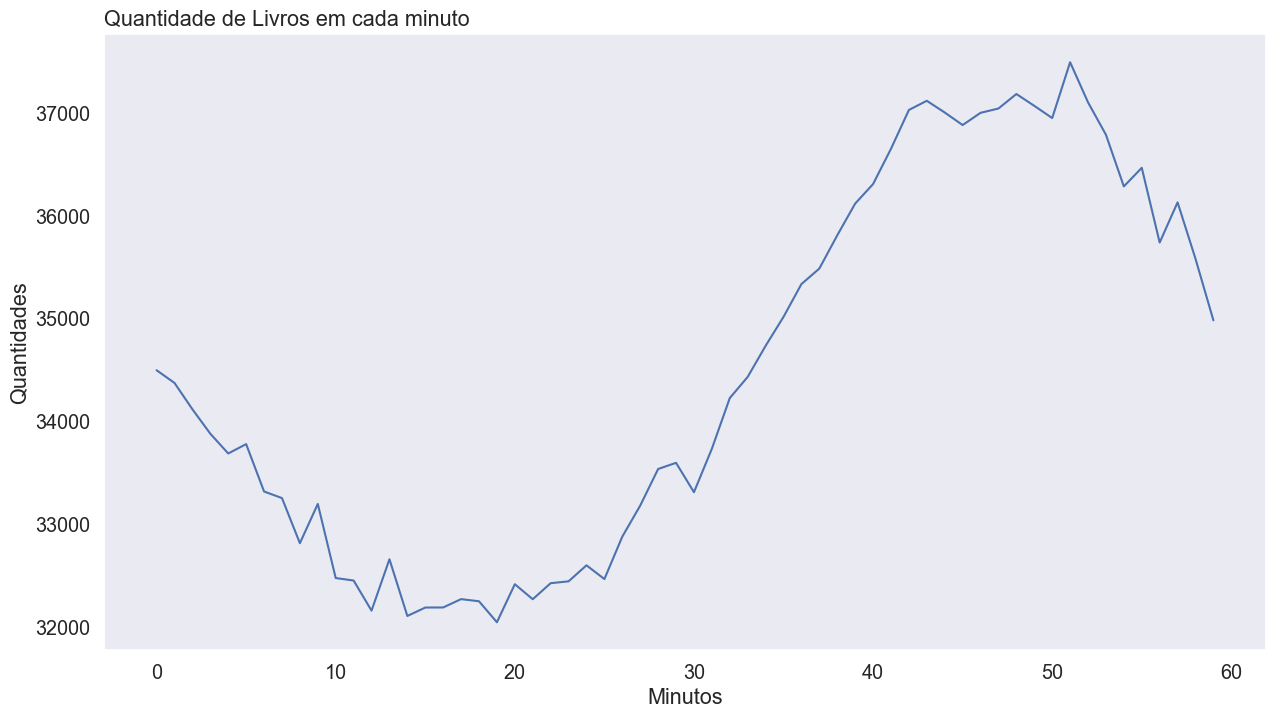

In [26]:
gr2 = sns.lineplot(data= emprestimos_minuto, x= 'minuto', y= 'quantidade', legend= 'full')
gr2.set_title(label= "Quantidade de Livros em cada minuto", loc= 'left')
gr2.set_ylabel('Quantidades')
gr2.set_xlabel('Minutos')

## Dia 4 - Continuando

In [31]:
emprestimos_completos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas
8,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas


In [34]:
emprestimos_completos['data_emprestimo'] = pd.to_datetime(emprestimos_completos['data_emprestimo'])

In [35]:
emprestimos_completos.dtypes

id_emprestimo                    int64
codigo_barras                   object
data_renovacao                  object
data_emprestimo         datetime64[ns]
data_devolucao                  object
matricula_ou_siape              object
tipo_vinculo_usuario            object
id_exemplar                      int64
colecao                         object
biblioteca                      object
status_material                 object
localizacao                      int64
CDU                             object
dtype: object

### Analisando com dados Categóricos

In [41]:
def gerar_tabela_frequencia(variavel):
    '''
    Essa função irá receber uma variavel categorica e irá retornar um dataframe dessa variavel com a quantidade de emprestimos e suas frequencias relativas
    
    varivel: variavel categórica escolhida
    '''
    
    dataframe = pd.DataFrame(emprestimos_completos[variavel].value_counts())
    dataframe.columns = ['quantidade']
    dataframe['percentual'] = round((dataframe.quantidade / dataframe.quantidade.sum())*100,2)
    return dataframe

In [43]:
gerar_tabela_frequencia('tipo_vinculo_usuario')

,quantidade,percentual
tipo_vinculo_usuario,,
ALUNO DE GRADUAÇÃO,1612324,77.80
ALUNO DE PÓS-GRADUAÇÃO,302541,14.60
DOCENTE,70981,3.42
SERVIDOR TÉCNICO-ADMINISTRATIVO,32184,1.55
ALUNO MÉDIO/TÉCNICO,28029,1.35
DOCENTE EXTERNO,23949,1.16
USUÁRIO EXTERNO,2509,0.12
OUTROS,5,0.00


In [44]:
gerar_tabela_frequencia('colecao')

,quantidade,percentual
colecao,,
Acervo Circulante,2053120,99.06
Multimeios,7954,0.38
Monografias,4021,0.19
Dissertações,2406,0.12
Obras de Referência,1954,0.09
Publicações de Autores do RN,866,0.04
Publicações da UFRN,764,0.04
Teses,714,0.03
Folhetos,271,0.01


In [45]:
gerar_tabela_frequencia('biblioteca')

,quantidade,percentual
biblioteca,,
Biblioteca Central Zila Mamede,1426122,68.81
Biblioteca Setorial do Centro Ciências da Saúde - CCS,118614,5.72
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,77609,3.74
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,66447,3.21
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,61478,2.97
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,46040,2.22
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",40744,1.97
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,32097,1.55
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,29089,1.40


In [47]:
gerar_tabela_frequencia('CDU')

,quantidade,percentual
CDU,,
Ciências aplicadas,1425473,68.78
Ciências sociais,369536,17.83
Matemática e ciências naturais,68744,3.32
Religião,62295,3.01
Filosofia e psicologia,61862,2.98
Generalidades. Ciência e conhecimento.,61222,2.95
Geografia. Biografia. História.,7989,0.39
Belas Artes,7911,0.38
Linguagem. Língua. Linguística.,7490,0.36
